# Chapter 3 Exercises

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az
import pymc3 as pm
np.random.seed(seed=0)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [3]:
az.style.use('arviz-darkgrid')

## Question 1
***

The priors in this model are

\begin{eqnarray}
\mu \text{~} Normal(0,10) \newline
\sigma \text{~} \left|Normal(0,25) \right|
\end{eqnarray}


The likelihood in our model is  
$$ Normal(\mu, \sigma)$$

And the posterior is

$$ y_i $$

## Question 2
***

There are two parameters in this model, $\mu$ and $\sigma$

## Question 3
***

Without expanding the denominator

$$ p(\mu, \sigma | y) = \frac{\Pi_i Normal(y| \mu, \sigma) Normal(\mu|0,10) |Normal(\sigma|0,25)|}{p(y)}  $$

Expanding the denominator
$$ p(\mu, \sigma | y) = \frac{\Pi_i Normal(y| \mu, \sigma) Normal(\mu|0,10) |Normal(\sigma|0,25)|}{\int \int \Pi_i Normal(y| \mu, \sigma) Normal(\mu|0,10) |Normal(\sigma|0,25)| d\mu d\sigma} $$

## Question 4
***

The linear model is 
\begin{eqnarray}
\mu = \alpha + \beta x
\end{eqnarray}


The likelihood in our model is  
$$ Normal(\mu, \epsilon)$$

The posterior will have three parameters

$$ \mu, \sigma, \epsilon $$

## Question 5
***

For this exercise we will generate 57 datapoints from a distribution of $N(4,. 5)$

In [4]:
data = stats.norm(4,.5).rvs(size=57)

In [5]:
with pm.Model() as model:
    mu = pm.Normal("mu", 0 ,10)
    sd = abs(pm.Normal("sd", 0, 25))
    y = pm.Normal("y,", mu, sd, observed=data)
    
    # Compute both prior, and prior predictive
    prior_predictive = pm.sample_prior_predictive()
    
    # Compute posterior
    trace = pm.sample()
    
    # Compute posterior predictive
    posterior_predictive = pm.sample_posterior_predictive(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, mu]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:01<00:00, 1047.34draws/s]
The acceptance probability does not match the target. It is 0.9473363830728522, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
100%|██████████| 1000/1000 [00:00<00:00, 1355.61it/s]


In [6]:
dataset = az.from_pymc3(trace=trace, posterior_predictive=posterior_predictive, prior=prior_predictive)

In [10]:
dataset.prior

<xarray.Dataset>
Dimensions:   (chain: 1, draw: 500, y,_dim_0: 57)
Coordinates:
  * chain     (chain) int64 0
  * draw      (draw) int64 0 1 2 3 4 5 6 7 8 ... 492 493 494 495 496 497 498 499
  * y,_dim_0  (y,_dim_0) int64 0 1 2 3 4 5 6 7 8 ... 48 49 50 51 52 53 54 55 56
Data variables:
    y,        (chain, draw, y,_dim_0) float64 3.632 2.833 1.979 ... -33.26 11.49
    sd        (chain, draw) float64 0.5084 -33.7 -19.04 ... 79.27 4.737 -33.71
    mu        (chain, draw) float64 3.025 -6.343 -3.627 ... -6.78 12.98 -23.64
Attributes:
    created_at:                 2019-02-24T02:58:03.104241
    inference_library:          pymc3
    inference_library_version:  3.6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c19137eb8>,
      dtype=object)

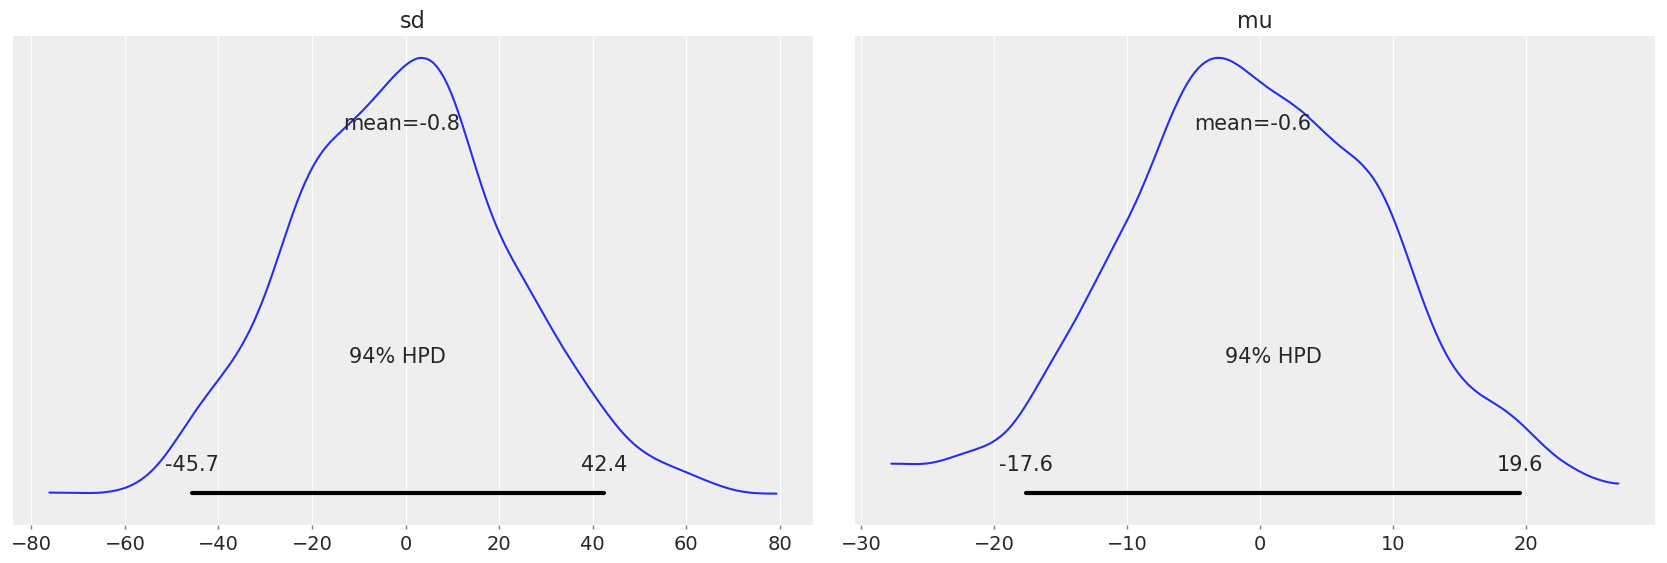

In [15]:
# The plot_posterior method can be used to plot priors as well
az.plot_posterior(dataset.prior[["sd", "mu"]])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c26272860>,
      dtype=object)

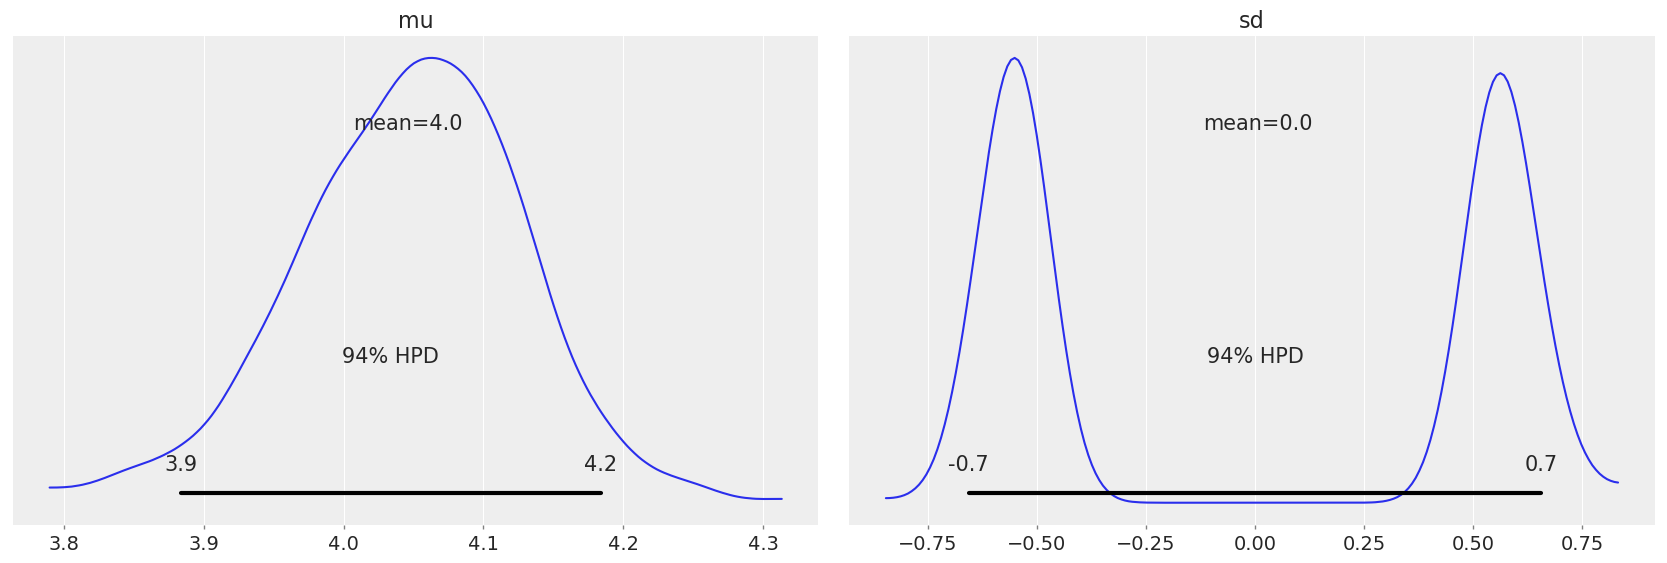

In [16]:
# Compare above plot to posterior distributiob below, as well as to original parameters in distribution
az.plot_posterior(dataset)